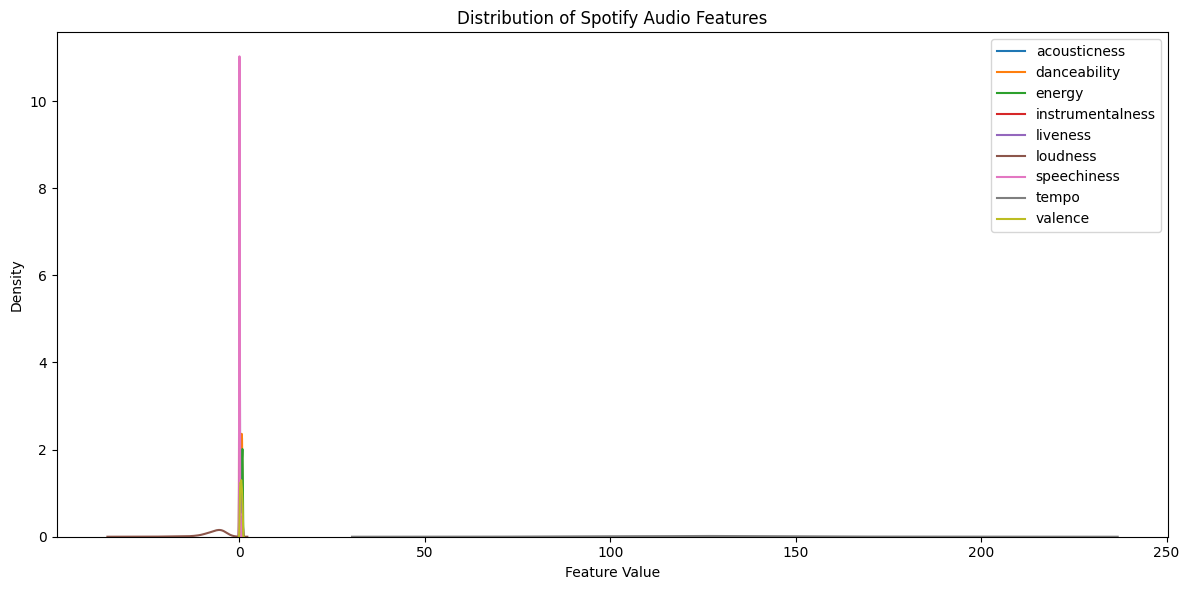

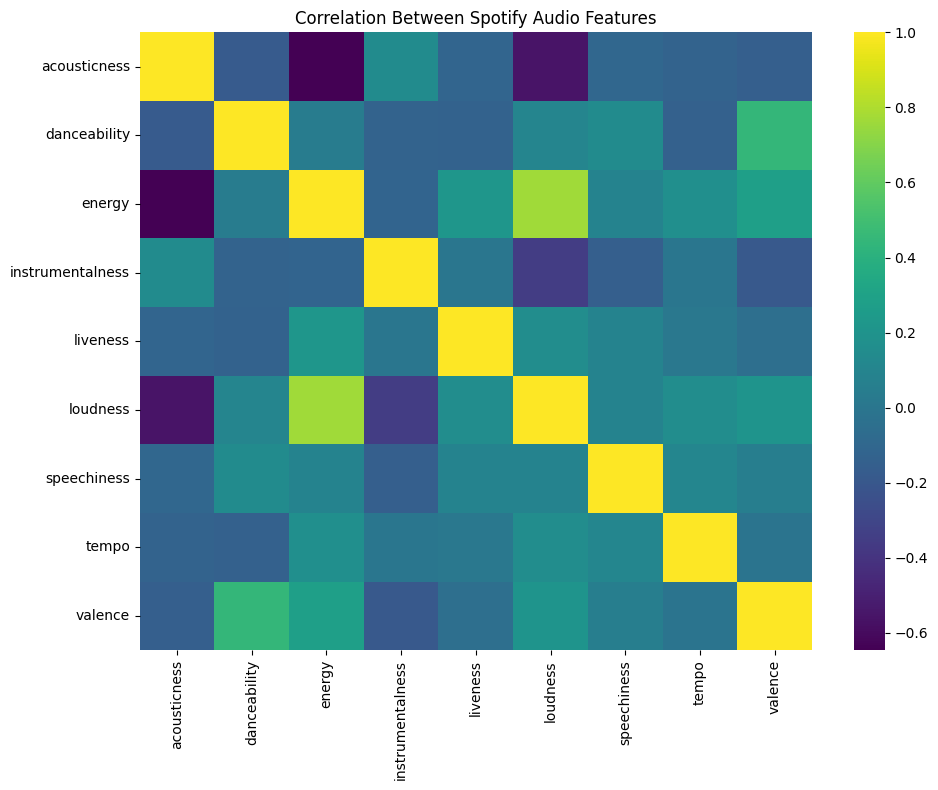

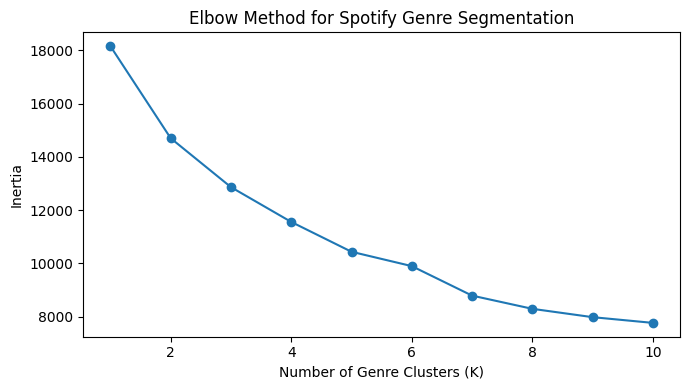

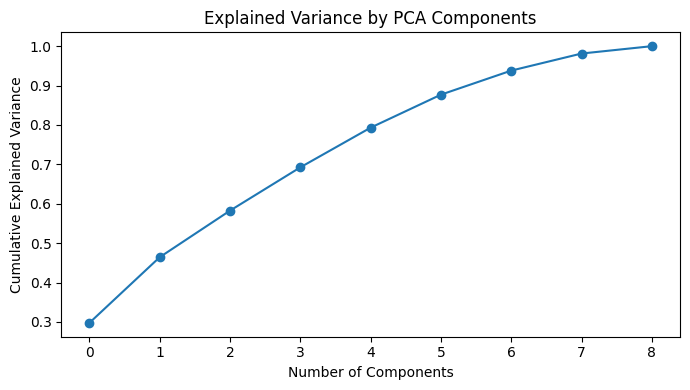

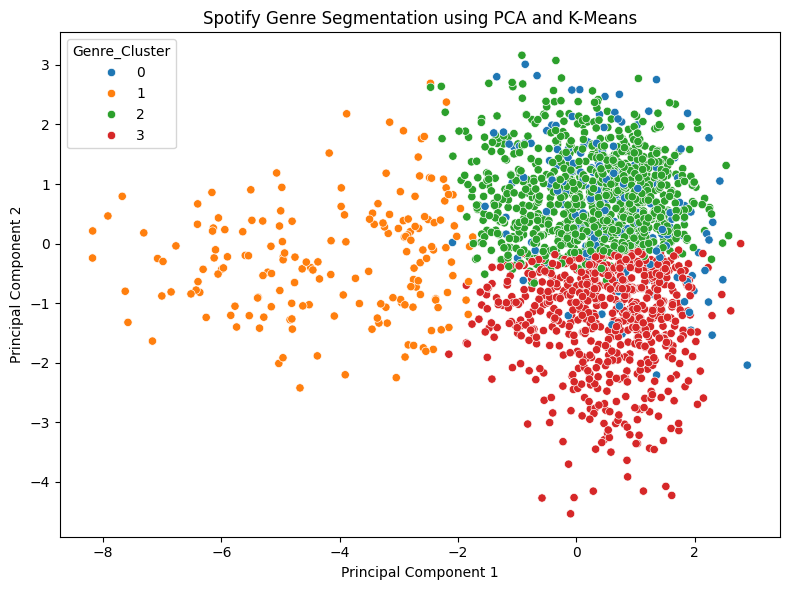

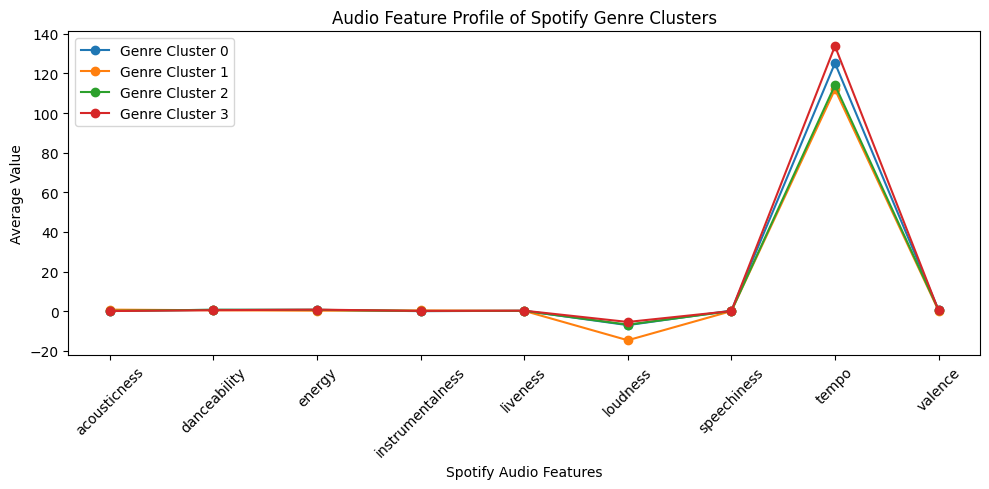

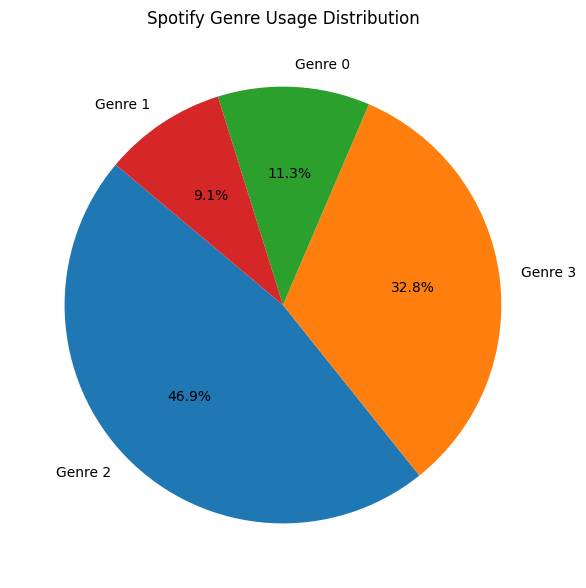

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# -------------------------------------------------------
# Load Spotify dataset
# -------------------------------------------------------
df = pd.read_csv("data.csv")

spotify_features = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence"
]

X = df[spotify_features]

# -------------------------------------------------------
# Feature scaling
# -------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------------
# CHART 1: Distribution of Spotify audio features
# -------------------------------------------------------
plt.figure(figsize=(12,6))
for col in spotify_features:
    sns.kdeplot(X[col], label=col)
plt.title("Distribution of Spotify Audio Features")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# CHART 2: Feature correlation (multi-colour heatmap)
# -------------------------------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap="viridis", annot=False)
plt.title("Correlation Between Spotify Audio Features")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# CHART 3: Elbow Method (K-Means – scikit-learn)
# -------------------------------------------------------
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, marker="o")
plt.title("Elbow Method for Spotify Genre Segmentation")
plt.xlabel("Number of Genre Clusters (K)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Apply K-Means clustering
# -------------------------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
df["Genre_Cluster"] = kmeans.fit_predict(X_scaled)

# -------------------------------------------------------
# CHART 4: PCA explained variance (line chart)
# -------------------------------------------------------
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(7,4))
plt.plot(
    np.cumsum(pca_full.explained_variance_ratio_),
    marker="o"
)
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# PCA for visualization
# -------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# -------------------------------------------------------
# CHART 5: Spotify genre segmentation (multi-coloured clustering)
# -------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Genre_Cluster",
    data=df,
    palette="tab10"
)
plt.title("Spotify Genre Segmentation using PCA and K-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# CHART 6: Mean audio profile of each genre cluster (line chart)
# -------------------------------------------------------
cluster_profile = df.groupby("Genre_Cluster")[spotify_features].mean()

plt.figure(figsize=(10,5))
for cluster in cluster_profile.index:
    plt.plot(
        spotify_features,
        cluster_profile.loc[cluster],
        marker="o",
        label=f"Genre Cluster {cluster}"
    )

plt.title("Audio Feature Profile of Spotify Genre Clusters")
plt.xlabel("Spotify Audio Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# CHART 7: Spotify genre usage distribution (pie chart)
# -------------------------------------------------------
genre_counts = df["Genre_Cluster"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    genre_counts.values,
    labels=[f"Genre {i}" for i in genre_counts.index],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Spotify Genre Usage Distribution")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Save final segmented dataset
# -------------------------------------------------------
df.to_csv("spotify_genre_segmented.csv", index=False)